**Problem Statement**

This is a problem to find estimated price for a second hand car given by some factors like Model Year, Km_driven, fuel type, current price of new car etc.

The problem is a regression problem.

**Dataset**

The dataset is taken from Kaggle https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [59]:
!pip install catboost

     |████████████████████████████████| 65.9MB 57kB/s 


# Step 1 - Importing the datasets

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()


# Step 2 - Importing the dataset

In [34]:
data = pd.read_csv('/content/drive/My Drive/Data Science Projects/car dataset.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis

# Step 3 - Getting some information about data

In [35]:
data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [36]:
print(sorted(data['Car_Name'].unique()))
print(sorted(data['Year'].unique()))
print(sorted(data['Fuel_Type'].unique()))
print(sorted(data['Seller_Type'].unique()))
print(sorted(data['Transmission'].unique()))
print(sorted(data['Owner'].unique()))

['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100', 'Bajaj Avenger 150', 'Bajaj Avenger 150 street', 'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger Street 220', 'Bajaj Discover 100', 'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F', 'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme', 'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour', 'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk', 'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus', 'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125', 'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine', 'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister', 'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma', 'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390', 'Mahindra Mojo XT300', 'Royal Enfield Bullet 350', 'Royal Enfield Classic 350', 'Royal Enfield Classic 500', 'Royal Enf

In [37]:
print(data['Year'].value_counts())
print(data['Fuel_Type'].value_counts())
print(data['Seller_Type'].value_counts())
print(data['Transmission'].value_counts())
print(data['Owner'].value_counts())

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


# Step 4 - Doing some data preprocessing

In [38]:
data['Number of Years'] = 2020 - data['Year'] # Creating another column which tells how old is car
data.drop(['Car_Name', 'Year'], axis = 1, inplace=True) # Deleting Car Name and Year as it is not needed
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


# Step 5 - Visualizing and removing outliers

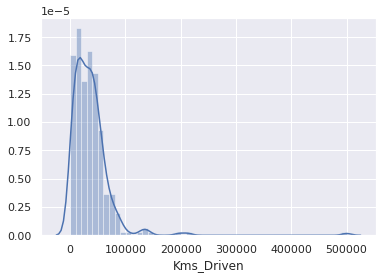

In [39]:
sb.distplot(data['Kms_Driven'])
h = data['Kms_Driven'].quantile(0.97)
l = data['Kms_Driven'].quantile(0.01)
data= data[data['Kms_Driven']>l]
data = data[data['Kms_Driven']<h]

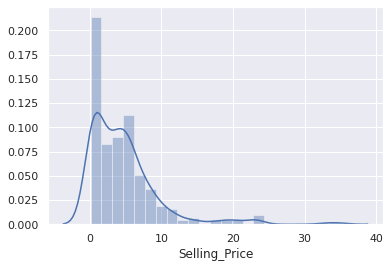

In [40]:
sb.distplot(data['Selling_Price'])
h = data['Selling_Price'].quantile(0.98)
data= data[data['Selling_Price']<h]

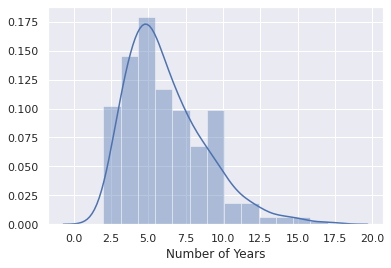

In [41]:
sb.distplot(data['Number of Years'])
l = data['Number of Years'].quantile(0.01)
data = data[data['Number of Years']>l]

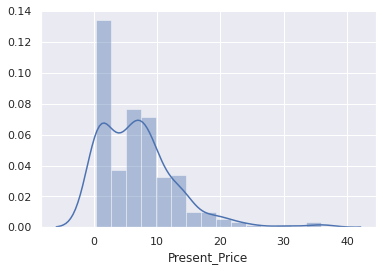

In [42]:
sb.distplot(data['Present_Price'])
h = data['Present_Price'].quantile(0.98)
data= data[data['Present_Price']<h]

In [43]:
data.reset_index(drop = True, inplace = True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
3,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
4,6.75,8.12,18796,Petrol,Dealer,Manual,0,5


# Step 6 - Divding data set in depedent and independent features

In [44]:
X = data.iloc[:, [1,2,3,4,5,6,7]]
Y = data.iloc[:, 0]

In [45]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number of Years
0,5.59,27000,Petrol,Dealer,Manual,0,6
1,9.54,43000,Diesel,Dealer,Manual,0,7
2,4.15,5200,Petrol,Dealer,Manual,0,9
3,6.87,42450,Diesel,Dealer,Manual,0,6
4,8.12,18796,Petrol,Dealer,Manual,0,5


In [46]:
Y.head()

0    3.35
1    4.75
2    2.85
3    4.60
4    6.75
Name: Selling_Price, dtype: float64

# Step 7 - Checking correlation of data

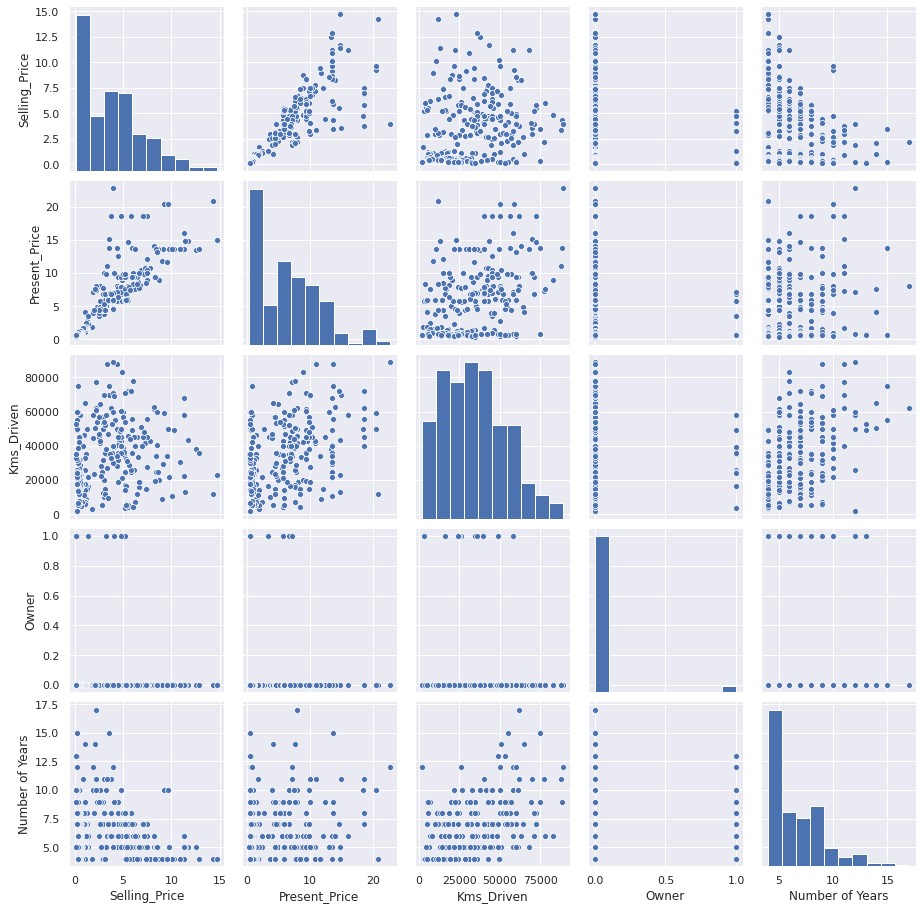

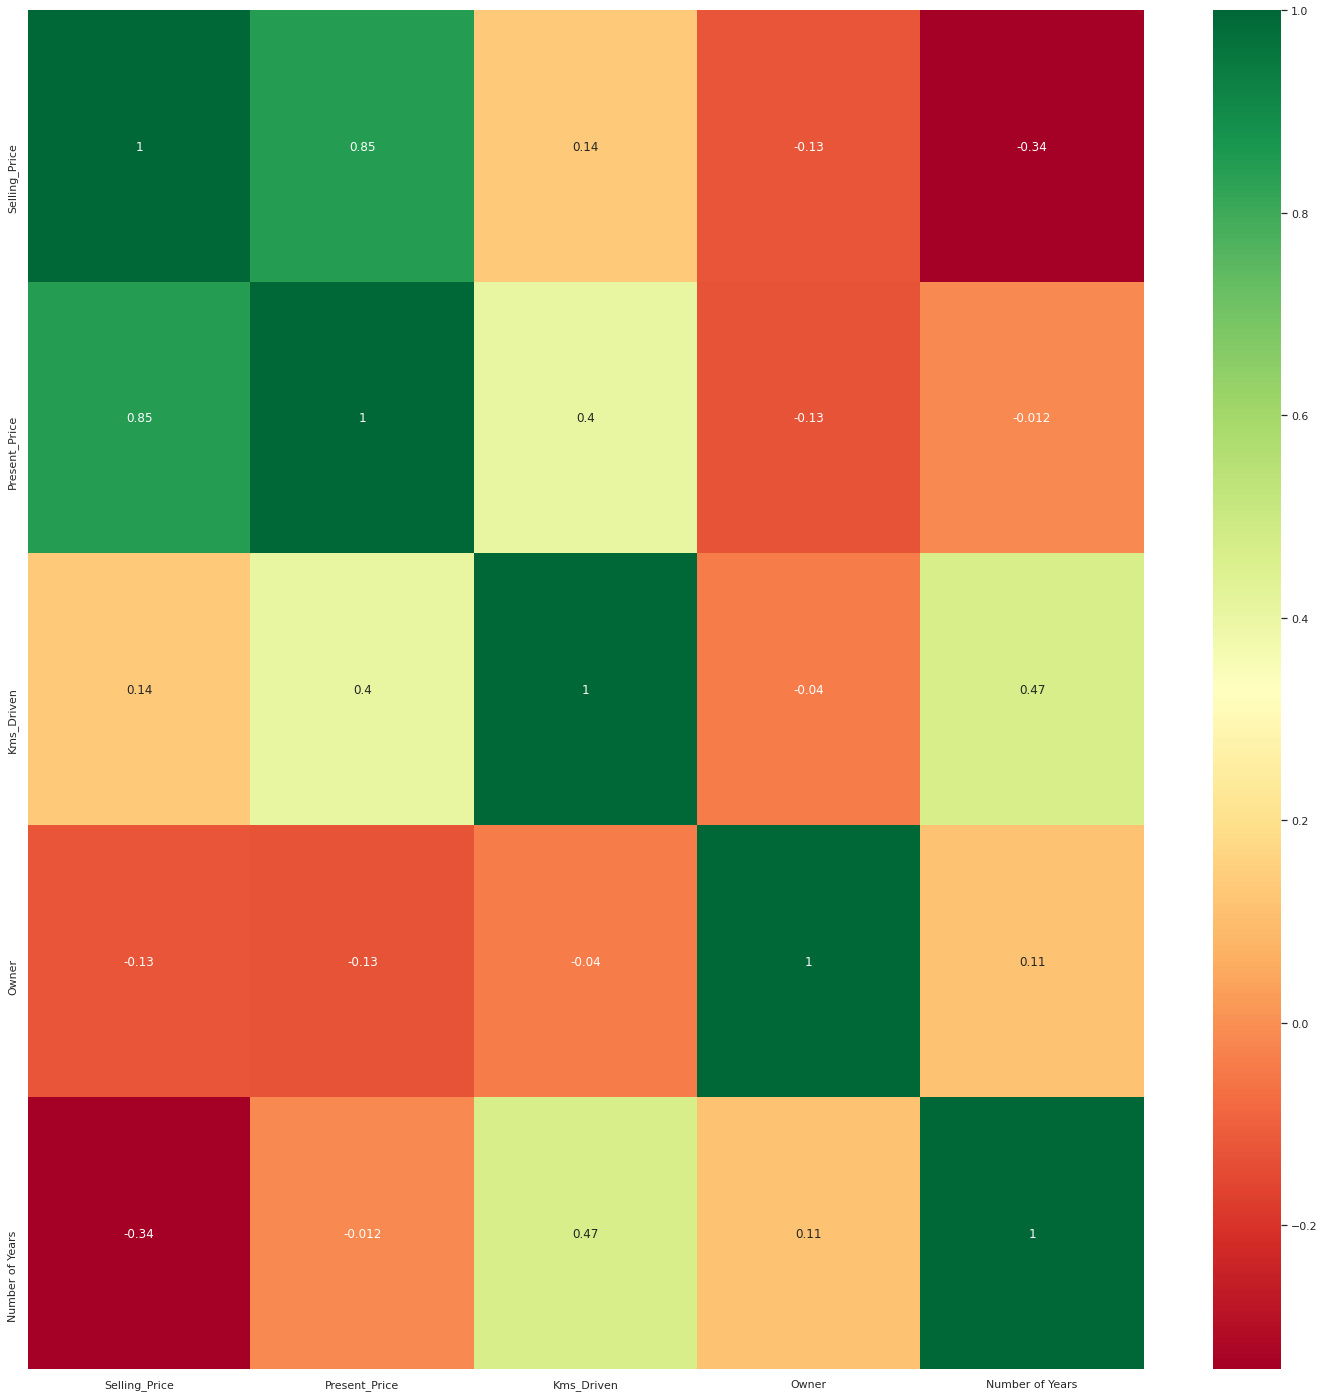

In [47]:
sb.pairplot(data)
correlation = data.corr() #We can delete those features which have correlation more than 0.8 or less than -0.8

plt.figure(figsize = (25,25))
sb.heatmap(correlation, annot = True, cmap = 'RdYlGn')

# Step 8 - Splliting into train and test set

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# Step 9 - One hot encoding the data

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder',  OneHotEncoder(), [2,3,4])], remainder = 'passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Step 10 - Creating and evaluating different Machine Learning models

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [67]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, Y_train)

Learning rate set to 0.029149
0:	learn: 3.1685837	total: 2.21ms	remaining: 2.2s
1:	learn: 3.1137012	total: 3.46ms	remaining: 1.73s
2:	learn: 3.0552095	total: 4.65ms	remaining: 1.54s
3:	learn: 2.9942024	total: 5.37ms	remaining: 1.34s
4:	learn: 2.9382311	total: 6.5ms	remaining: 1.29s
5:	learn: 2.8796498	total: 7.92ms	remaining: 1.31s
6:	learn: 2.8214015	total: 9.07ms	remaining: 1.29s
7:	learn: 2.7607441	total: 10.2ms	remaining: 1.27s
8:	learn: 2.7060120	total: 11.4ms	remaining: 1.25s
9:	learn: 2.6535045	total: 12.5ms	remaining: 1.24s
10:	learn: 2.5970486	total: 13.6ms	remaining: 1.22s
11:	learn: 2.5497230	total: 14.2ms	remaining: 1.17s
12:	learn: 2.5011242	total: 15.3ms	remaining: 1.16s
13:	learn: 2.4513486	total: 16.6ms	remaining: 1.17s
14:	learn: 2.4053860	total: 17.8ms	remaining: 1.17s
15:	learn: 2.3568109	total: 19.1ms	remaining: 1.17s
16:	learn: 2.3208619	total: 20.7ms	remaining: 1.2s
17:	learn: 2.2790243	total: 23.5ms	remaining: 1.28s
18:	learn: 2.2423296	total: 24.6ms	remaining: 1

# Step 11 - Evaluating model accuracy

In [68]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(regressor, X = X_train, y = Y_train, cv = 10)

yhat = regressor.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
accuracy = r2_score(Y_test, yhat)
mse = mean_squared_error(Y_test, yhat)

print("Mean Accuracy " , accuracies.mean())
print("Test Accuracy", accuracy)
print("Mean Squared Error ", mse)

Streaming output truncated to the last 5000 lines.
8:	learn: 2.7454125	total: 9.2ms	remaining: 1.01s
9:	learn: 2.6939416	total: 10.4ms	remaining: 1.02s
10:	learn: 2.6553211	total: 10.9ms	remaining: 984ms
11:	learn: 2.6028970	total: 12ms	remaining: 989ms
12:	learn: 2.5553838	total: 13.1ms	remaining: 992ms
13:	learn: 2.5099998	total: 14.3ms	remaining: 1s
14:	learn: 2.4646505	total: 15.3ms	remaining: 1s
15:	learn: 2.4174613	total: 16.3ms	remaining: 1s
16:	learn: 2.3825925	total: 17.4ms	remaining: 1.01s
17:	learn: 2.3435771	total: 18.5ms	remaining: 1.01s
18:	learn: 2.3067886	total: 19.5ms	remaining: 1.01s
19:	learn: 2.2676280	total: 20.5ms	remaining: 1s
20:	learn: 2.2259343	total: 21.7ms	remaining: 1.01s
21:	learn: 2.1929909	total: 22.7ms	remaining: 1.01s
22:	learn: 2.1510375	total: 23.8ms	remaining: 1.01s
23:	learn: 2.1213893	total: 24.8ms	remaining: 1.01s
24:	learn: 2.0857381	total: 25.9ms	remaining: 1.01s
25:	learn: 2.0518791	total: 26.9ms	remaining: 1.01s
26:	learn: 2.0202399	total: 27

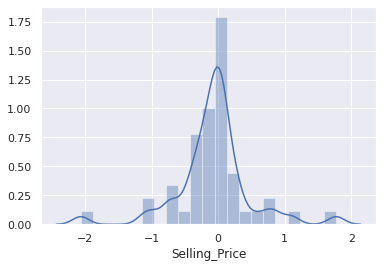

In [62]:
sb.distplot(Y_test-yhat) # It should be a normal distribution

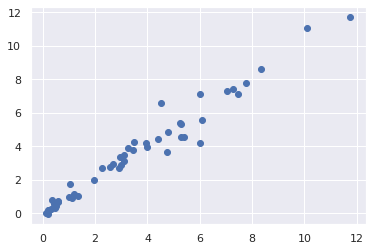

In [63]:
plt.scatter(Y_test, yhat) # it should be close to linear

# Step 12 - Saving model as pickle for later use

In [66]:
import pickle

with open("model.pkl", "wb") as filename:
  pickle.dump(regressor, filename)

**Conclusion**

Below is the details of how a good models performed.

**Linear Regression**

Mean Accuracy  0.8308204696958332
Test Accuracy 0.8737963707369926
Mean Squared Error  0.9943713044223557

**CatBoost**

Mean Accuracy  0.9375852759648472
Test Accuracy 0.9599371809608589
Mean Squared Error  0.3156590492636855

We can clearly see that CatBoost outperforms other model, thus we will be choosing this model for further use and saving it as pickel file.